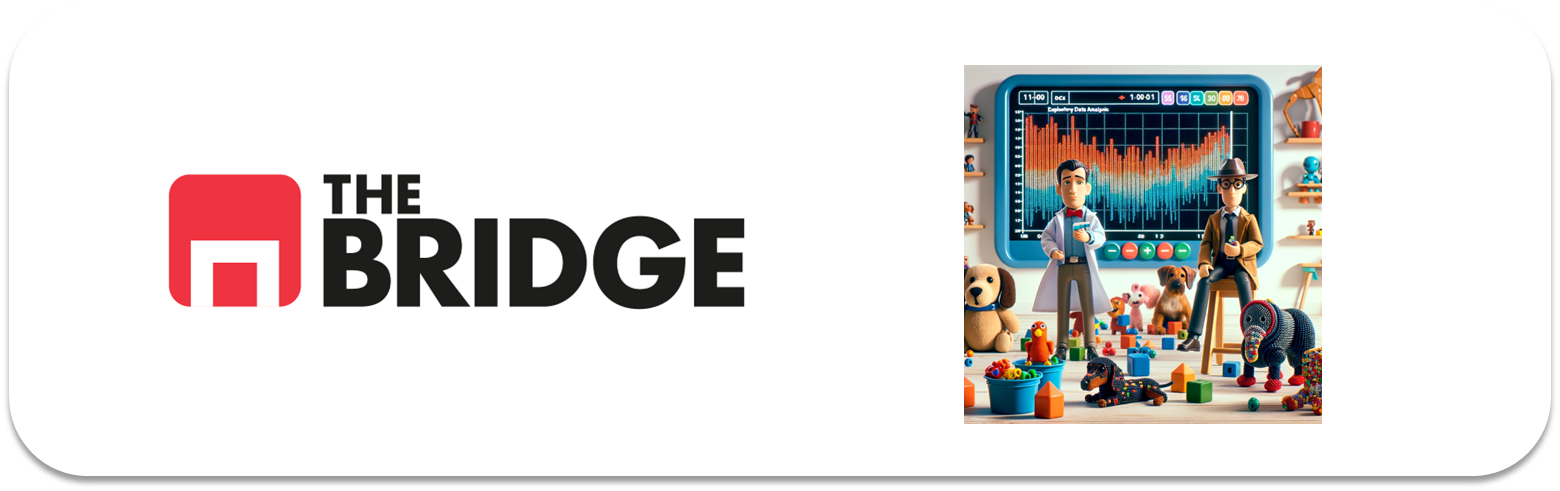

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df=pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df=df.drop(["deck", "survived", "pclass","embarked"], axis=1)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
print(df.columns.tolist())

['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


In [5]:
df["family_members"]= df["parch"]+ df["sibsp"]
df=df.drop(["parch","sibsp"],axis=1)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
new_embark=df["embark_town"].mode()[0]
df["embark_town"]=df["embark_town"].fillna(new_embark)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
# Iterar sobre las categorías únicas en la columna 'Who'
for category in df['who'].unique():
    # Calcular la media de 'Age' para cada categoría
    mean_age = df.loc[df['who'] == category, 'age'].mean()
    
    # Imputar la media en los valores nulos de 'Age' según la categoría de 'Who'
    df.loc[(df['who'] == category) & (df['age'].isnull()), 'age'] = mean_age

df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [8]:
#primero obtenemos la cardinalidad para que con las descripciones nos ayude a saber que tenemos qeu estudiar, y en que nos tenemos que fijar
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                    1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
sex,2,0.224467,object
age,89,9.988777,float64
fare,248,27.833895,float64
class,3,0.3367,object
who,3,0.3367,object
adult_male,2,0.224467,bool
embark_town,3,0.3367,object
alive,2,0.224467,object
alone,2,0.224467,bool
family_members,9,1.010101,int64


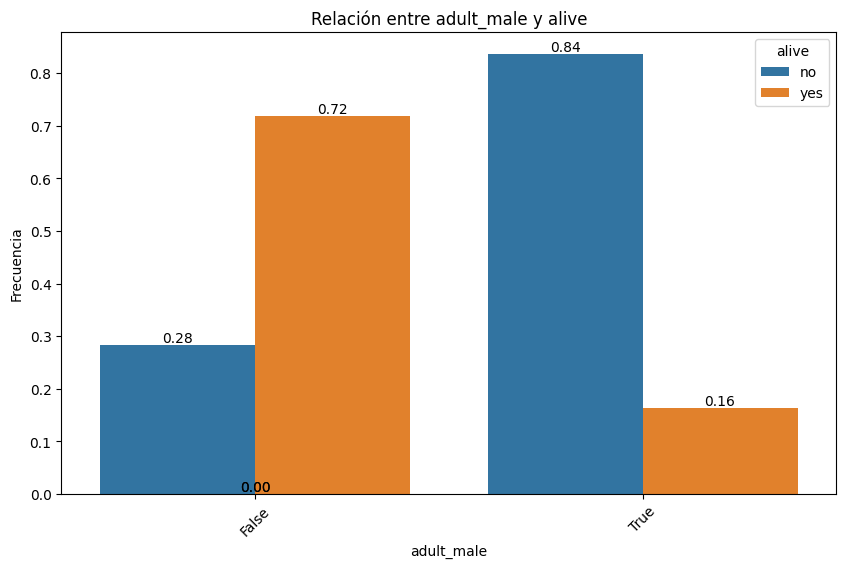

In [9]:
plot_categorical_relationship_fin(df, "adult_male","alive", relative_freq = True, show_values = True)

In [10]:
categoricas_df=["alive","who","adult_male","class"]

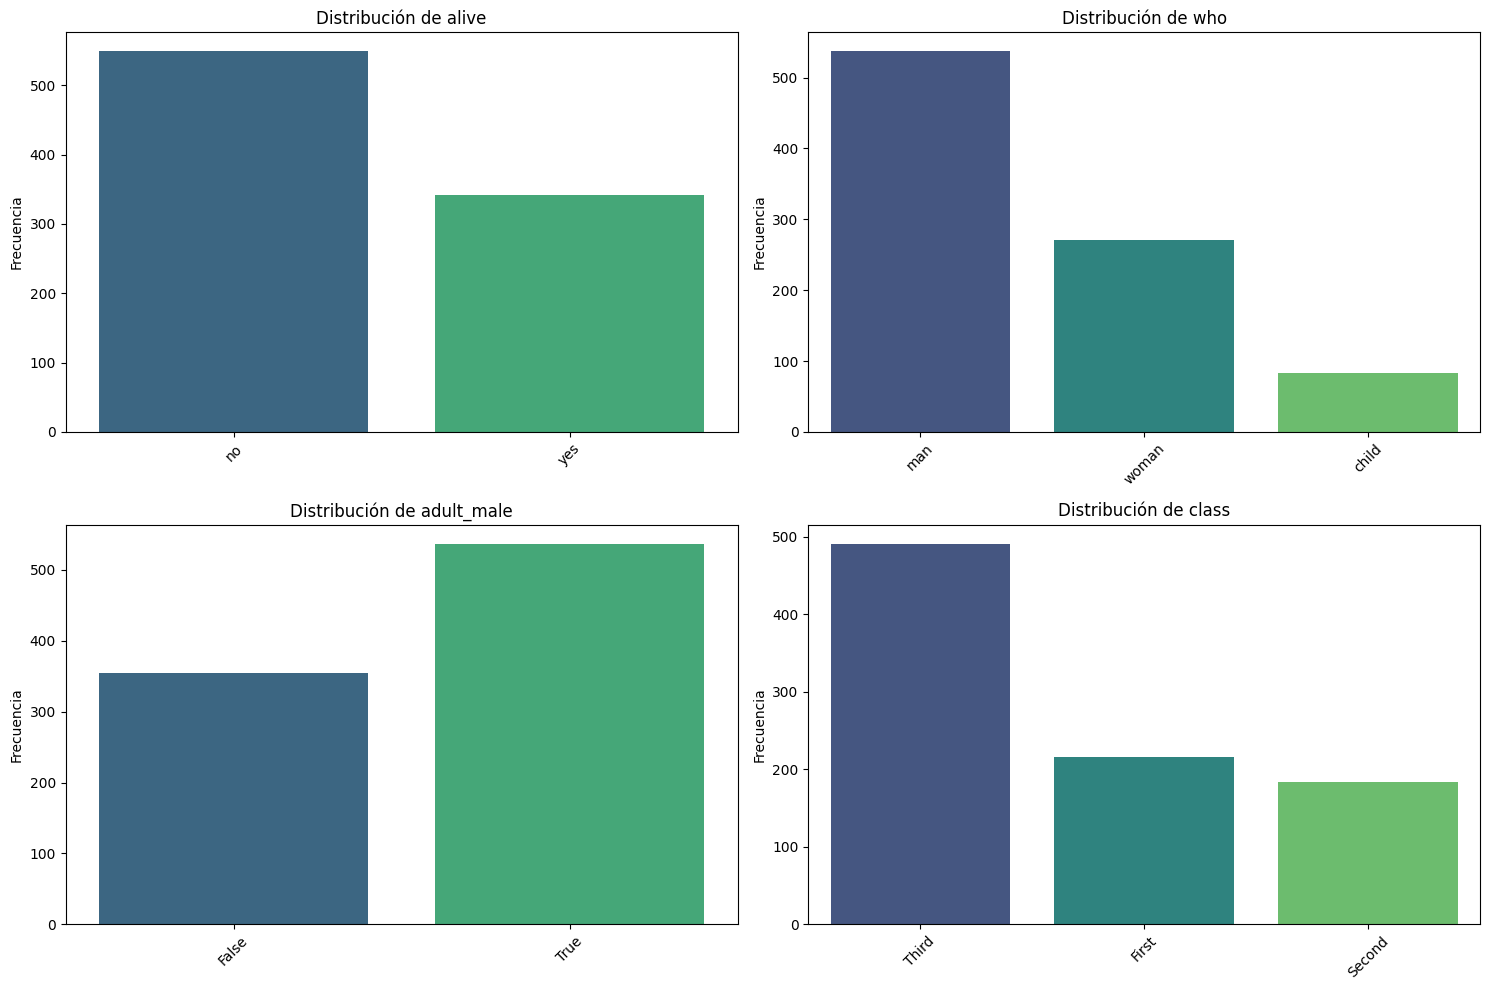

In [11]:
pinta_distribucion_categoricas(df,categoricas_df)

In [12]:
tabla_contingencia = pd.crosstab(df['who'], df['alive'])

tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [13]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


### Conclusion 1
Existe una relación estadísticamente significativa entre la supervivencia y el hecho de ser hombre, mujer o niño, ya que el test de Chi-cuadrado muestra que las diferencias observadas no son aleatorias. Los niños sobrevivieron en más de la mitad de los casos (49/83 ≈ 59%), los hombres sobrevivieron en una minoría (88/537 ≈ 16%), y las mujeres sobrevivieron en una mayoría significativa (205/271 ≈ 76%). Esto demuestra que la variable categórica Who (hombre, mujer, niño) tiene una fuerte influencia en la probabilidad de supervivencia en el Titanic.

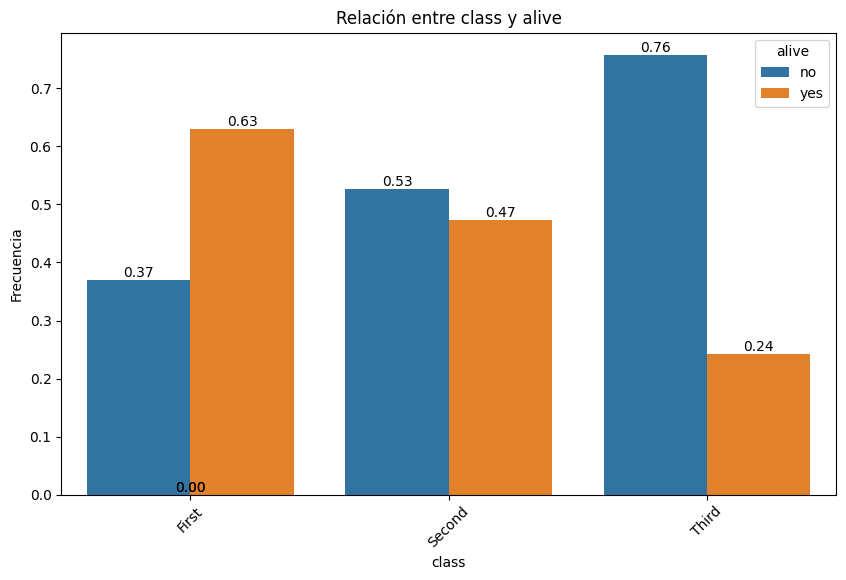

In [14]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq = True, show_values = True)

In [15]:
tabla_clase = pd.crosstab(df['class'], df['alive'])

tabla_clase

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [16]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_clase)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### Conclusion 2
Existe una relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia, ya que el valor ￼ es menor a 0.05. En términos absolutos, la primera clase tiene el mayor número de sobrevivientes (136), seguida de la segunda clase (87) y la tercera clase (119). Sin embargo, la tercera clase tiene la mayor cantidad de pasajeros que no sobrevivieron (372). Esto muestra que la clase tiene una influencia significativa en las probabilidades de supervivencia en el Titanic.

In [17]:
categoricas_2=["alive","embark_town"]

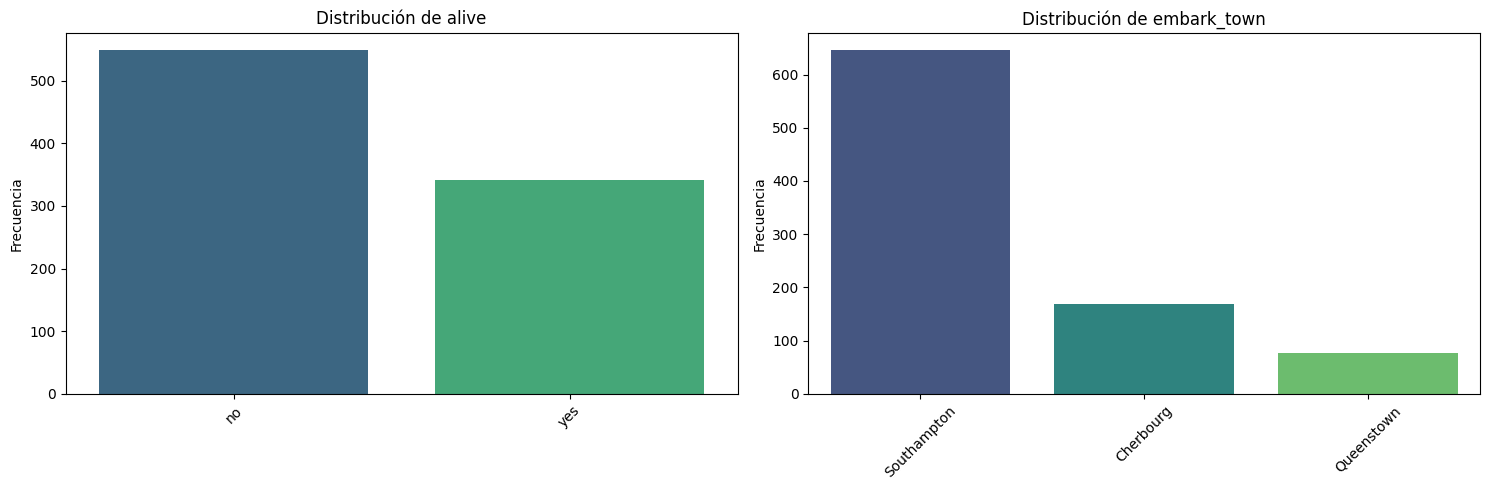

In [18]:
pinta_distribucion_categoricas(df,categoricas_2)

In [19]:
tabla_embarque = pd.crosstab(df['embark_town'], df['alive'])

tabla_embarque

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_embarque)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


### Conclusion 3
Existe una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia en el Titanic, como lo indica el valor p de 2.13 \times 10^{-16} . Esto sugiere que la ciudad en la que los pasajeros embarcaron tuvo un impacto considerable en sus probabilidades de supervivencia. • Cherbourg (C) tuvo la mayor tasa de supervivencia, con 93 sobrevivientes frente a 75 que no sobrevivieron. • Southampton (S) tuvo una gran cantidad de pasajeros, pero con una tasa de supervivencia más baja. • Queenstown (Q) también mostró una tasa baja de supervivencia, con solo 30 sobrevivientes frente a 47 que no lo hicieron.

Esto implica que el lugar de embarque es un factor relevante en las probabilidades de sobrevivir al hundimiento.

In [21]:
grupos = df['alive'].unique()  
tasa_billete = [df[df['alive'] == grupo]['fare'] for grupo in grupos] 
tasa_billete

[0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: fare, Length: 342, dtype: float64]

In [22]:
from scipy import stats

In [23]:
f_val, p_val = stats.f_oneway(*tasa_billete) # El método *
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 63.03076422804448
Valor p: 6.120189341921873e-15


### Conclusion 4
El análisis de la relación entre el precio del pasaje (columna Fare) y la supervivencia muestra que el precio tiene una relación estadísticamente significativa con la supervivencia. El valor p obtenido ( p = 0.000000… \times 10^{-16} ) es extremadamente bajo, lo que indica que esta relación es muy significativa. Además, el valor de F es 63.03, lo que refleja una gran diferencia en las medias de los precios de los pasajes entre los supervivientess y los no supervivientes. En general, los supervivientes tendieron a pagar un precio más alto por sus boletos, lo que sugiere que los pasajeros de clases más altas tenían mayores probabilidades de sobrevivir.

In [24]:
no_pagado=df[df["fare"]==0]

print(no_pagado["class"].value_counts())
print(no_pagado["alive"].value_counts())
print(no_pagado.groupby(["class","embark_town"]).size())

class
Second    6
First     5
Third     4
Name: count, dtype: int64
alive
no     14
yes     1
Name: count, dtype: int64
class   embark_town
First   Southampton    5
Second  Southampton    6
Third   Southampton    4
dtype: int64


In [25]:
max_fare = df['fare'].max()
pasajero_max_fare = df[df['fare'] == max_fare]
print(pasajero_max_fare)

        sex   age      fare  class    who  adult_male embark_town alive  \
258  female  35.0  512.3292  First  woman       False   Cherbourg   yes   
679    male  36.0  512.3292  First    man        True   Cherbourg   yes   
737    male  35.0  512.3292  First    man        True   Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0  


### Conclusion 5
Hubo 15 pasajeros que no pagaron el billete, todos adultos, la mayoría en segunda y tercera clase, pero también 5 en primera clase. Ninguno de ellos sobrevivió, lo que podría reflejar desventajas relacionadas con su condición o acceso a recursos. Por otro lado, los 3 pasajeros que pagaron la tarifa más alta (dos hombres y una mujer menor de edad) sobrevivieron y se embarcaron en Cherburgo, lo que destaca una posible ventaja asociada con el coste del billete, la clase social, y el lugar de embarque. Esto sugiere que factores como el precio, la clase, y el embarque en Cherburgo influyeron en las probabilidades de supervivencia.

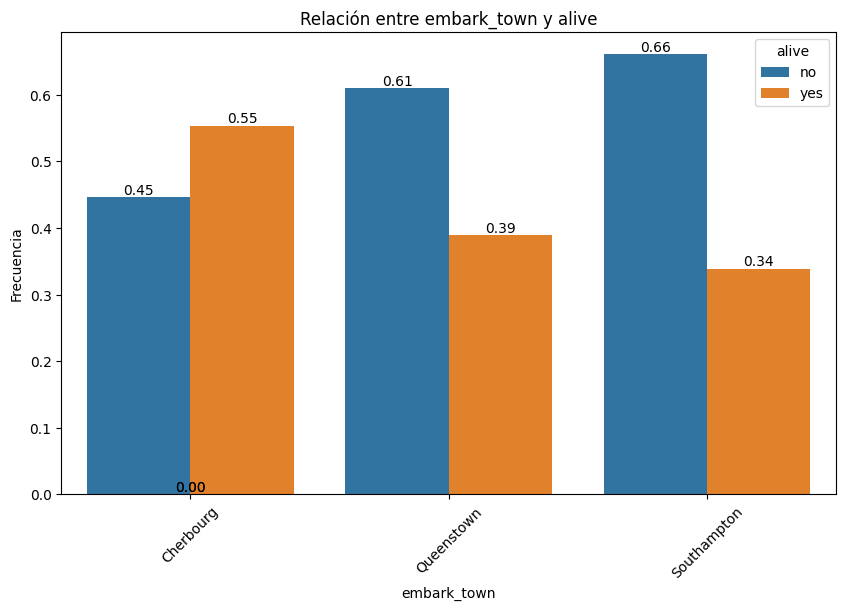

In [26]:
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = True, show_values = True)

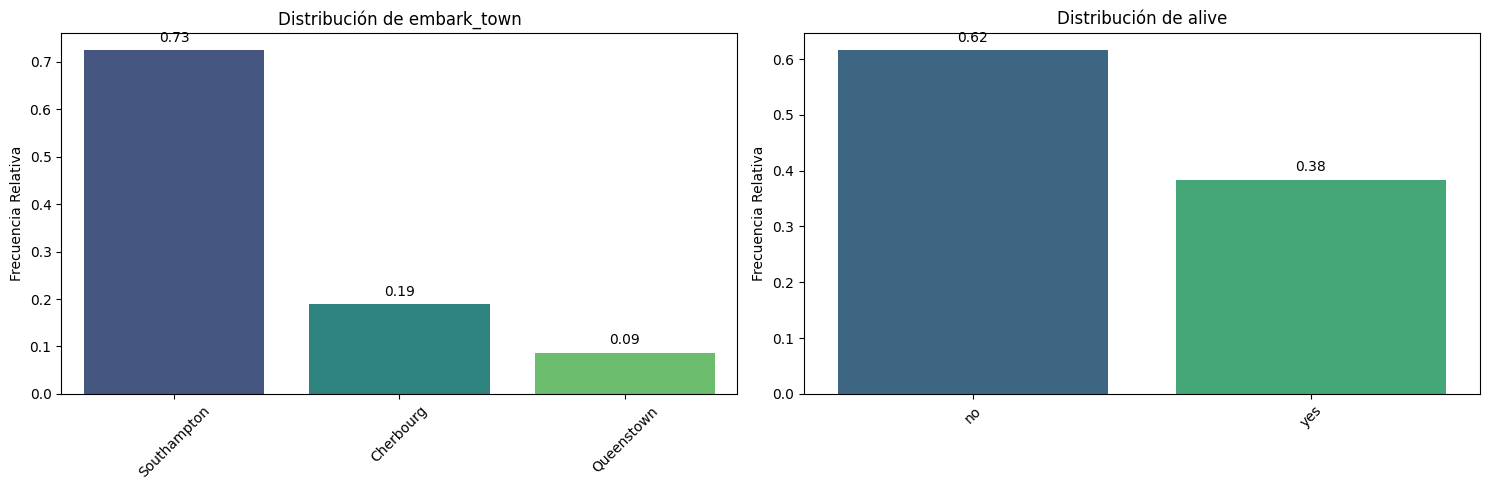

In [27]:
pinta_distribucion_categoricas(df,["embark_town","alive"], relativa= True, mostrar_valores= True)

### Conclusion 6
analizando frecuencias relativas yabsoltas de alive y eciudad embarque vemos que sobrevivio mucha mas gente que embarco en cherbourg, y por lo analisis anteriores vemos que hay una relacion entre esta ciudad con el precio del billete ya que las personas que mas pagaron por su billete embarcaron en esa ciudad, por tanto la supervivencia si que tiene relacion con el precio del billete y con la ciudad de embarque

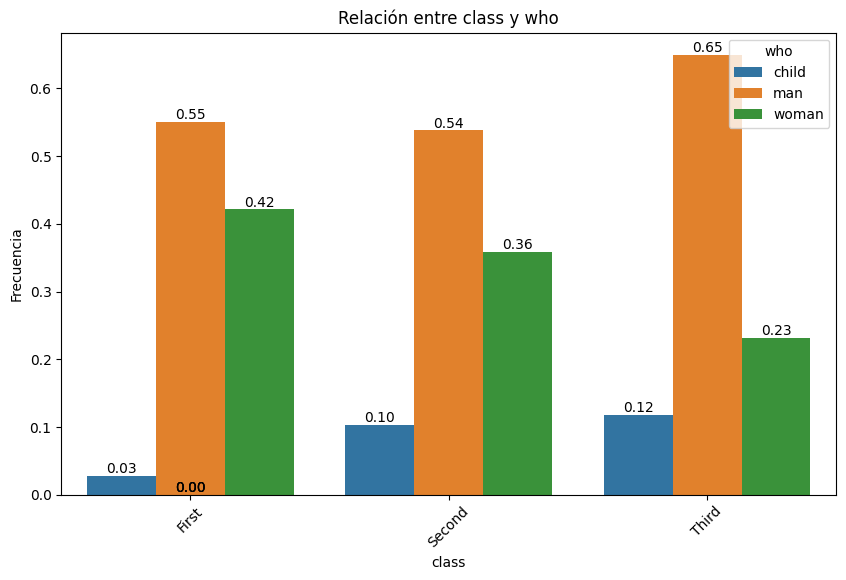

In [28]:
plot_categorical_relationship_fin(df, "class","who", relative_freq = True, show_values = True)

In [29]:
abs_survival = df[df['alive'] =="no" ].groupby(['class', 'who']).size()
print(abs_survival)

class   who  
First   child      1
        man       77
        woman      2
Second  man       91
        woman      6
Third   child     33
        man      281
        woman     58
dtype: int64


In [30]:
total_passengers = df.groupby(['class', 'who']).size()

# Porcentaje 
relative_survival = (abs_survival / total_passengers) * 100
print(relative_survival)

class   who  
First   child    16.666667
        man      64.705882
        woman     2.197802
Second  child          NaN
        man      91.919192
        woman     9.090909
Third   child    56.896552
        man      88.087774
        woman    50.877193
dtype: float64


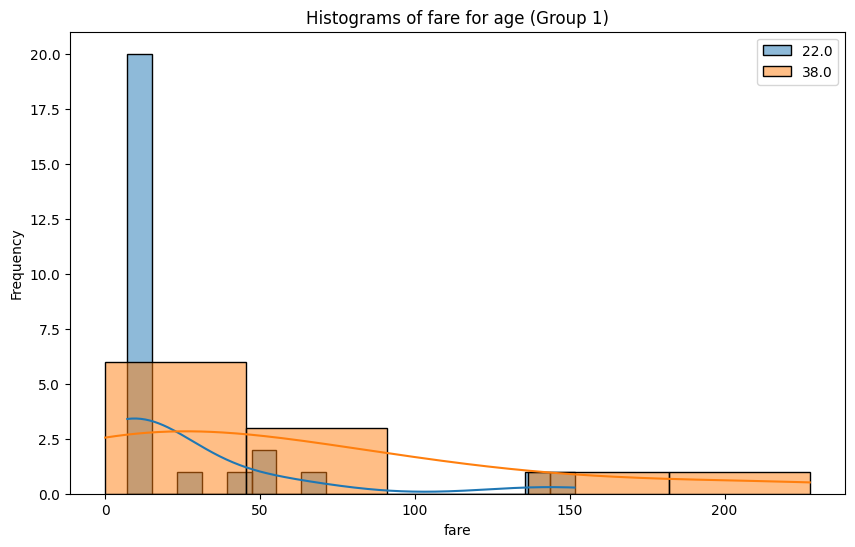

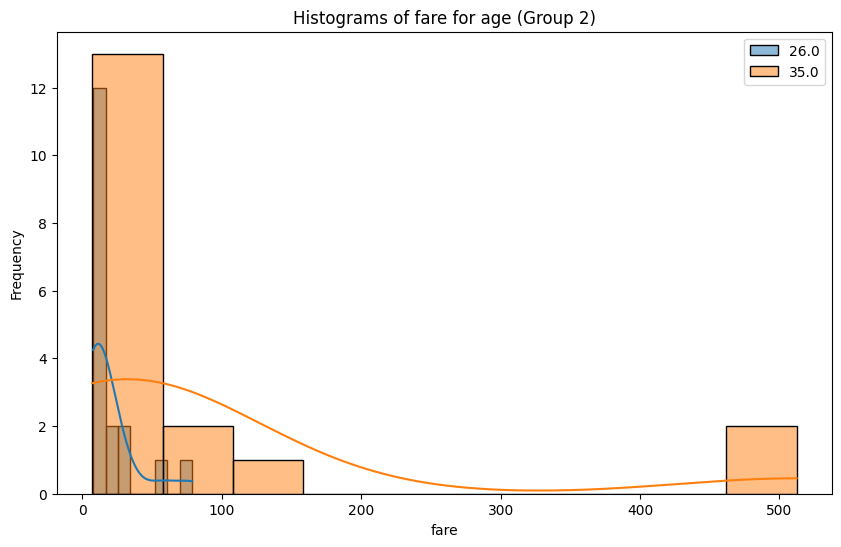

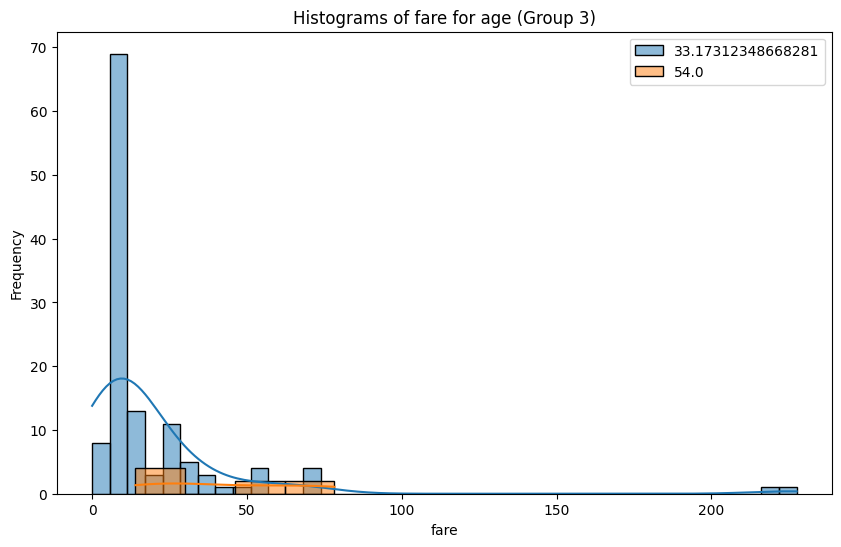

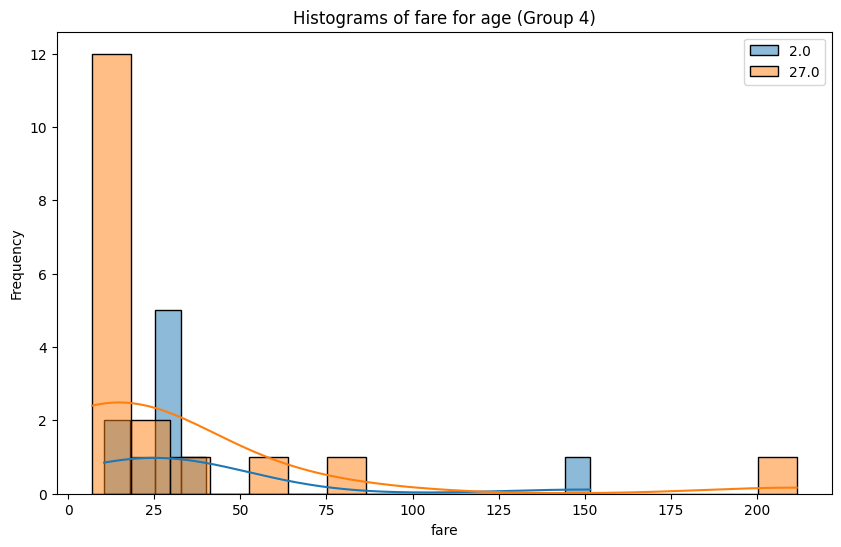

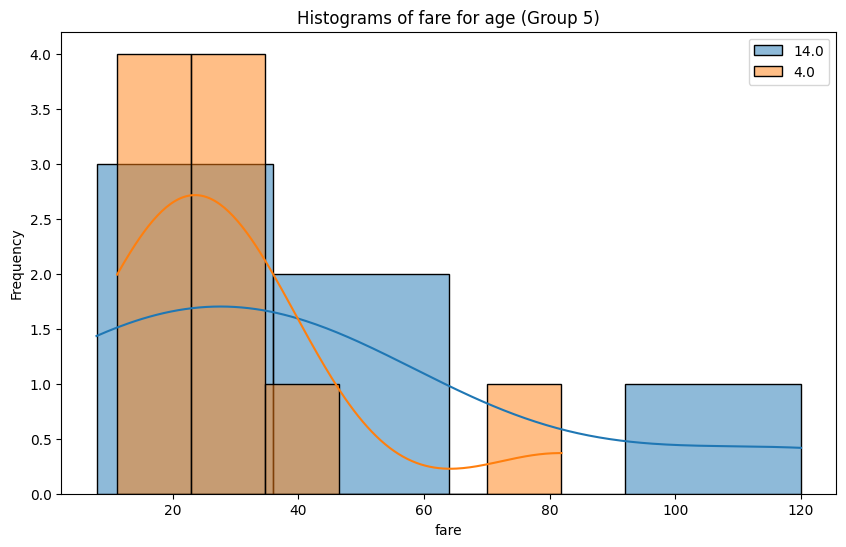

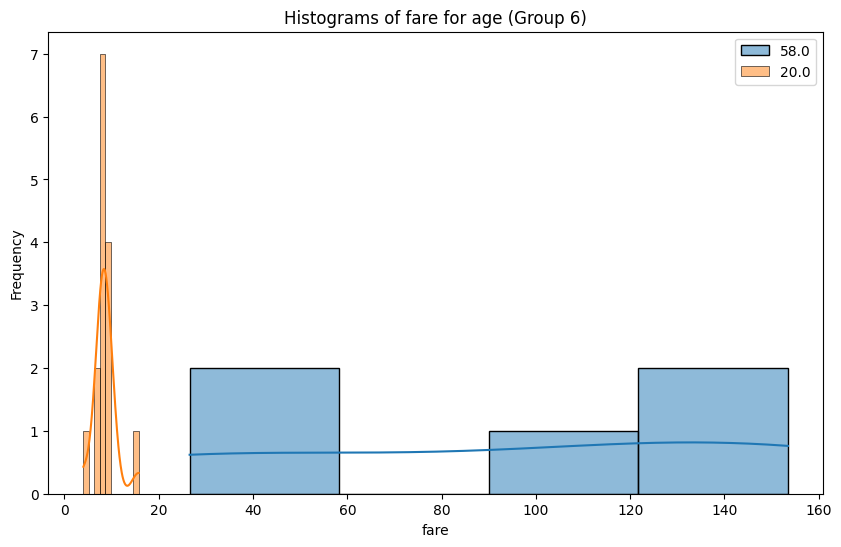

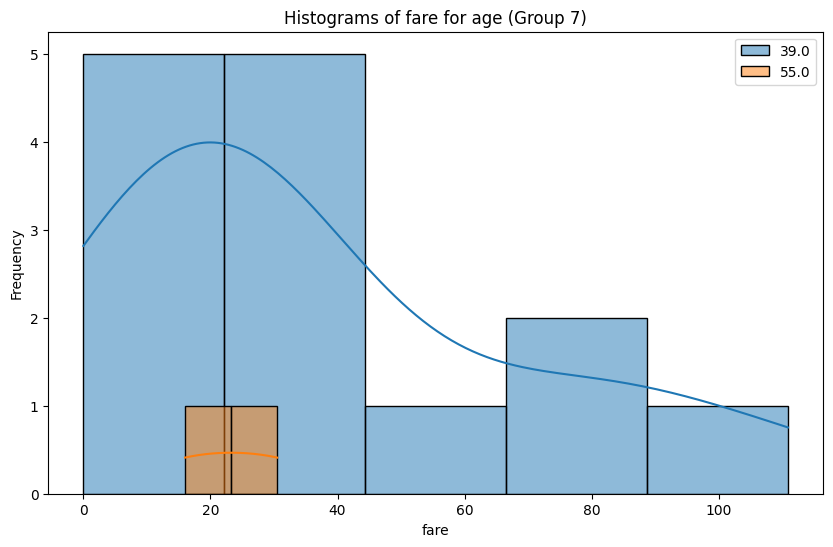

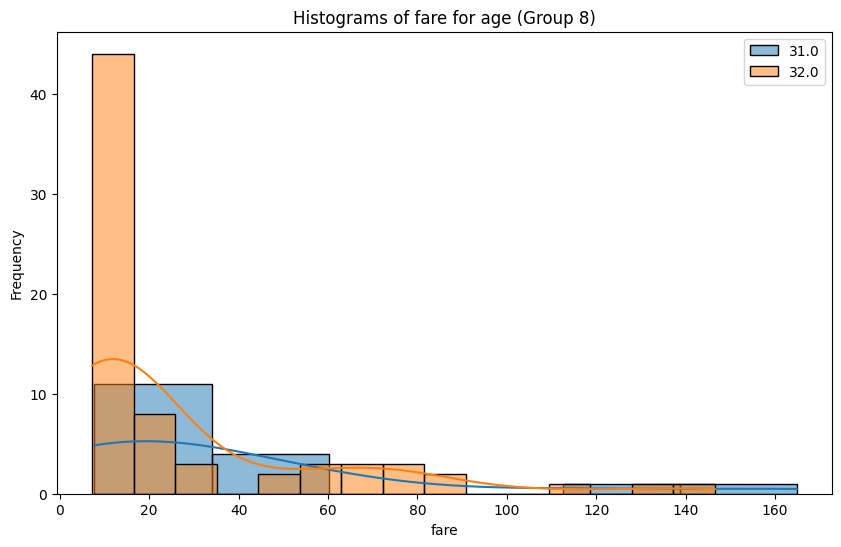

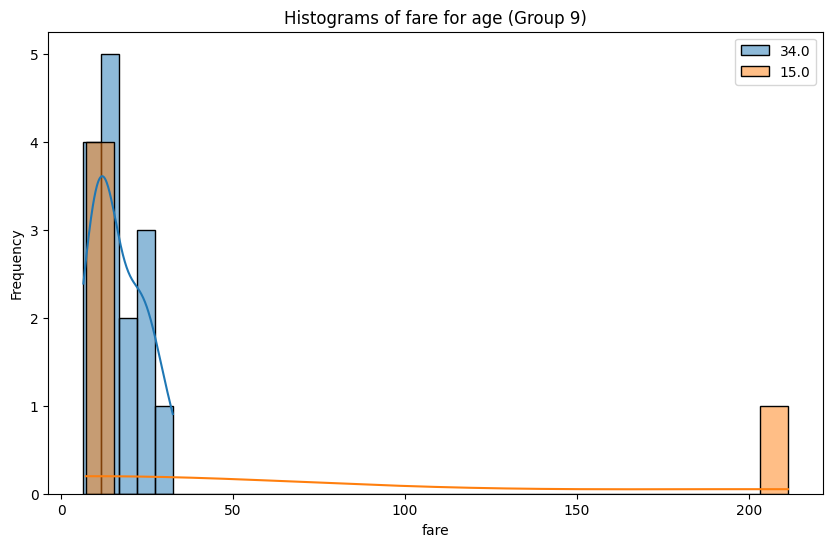

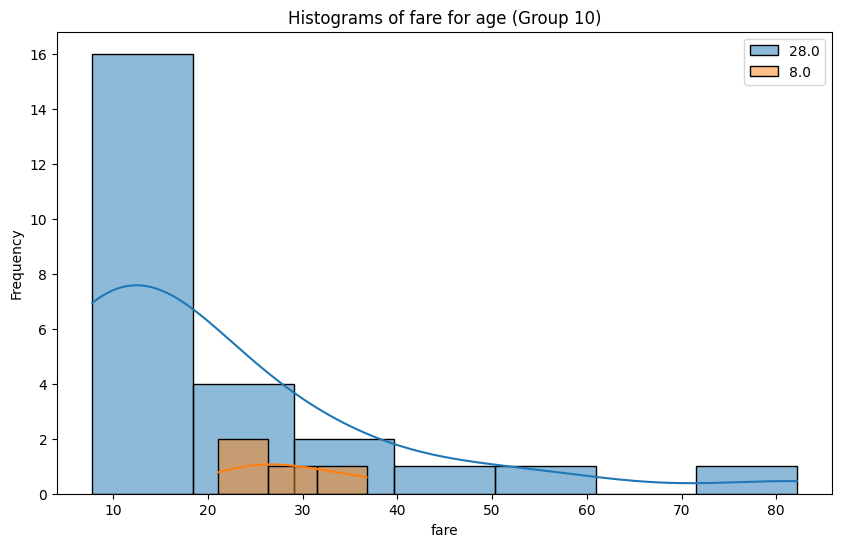

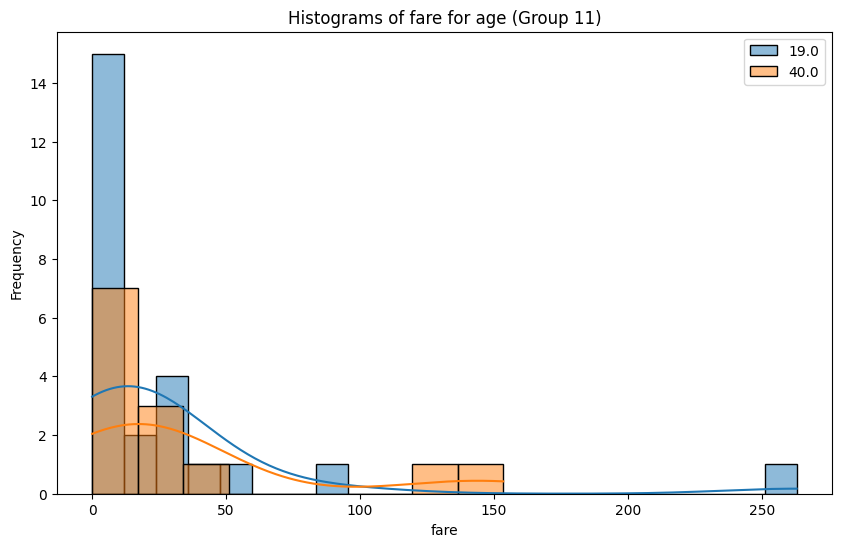

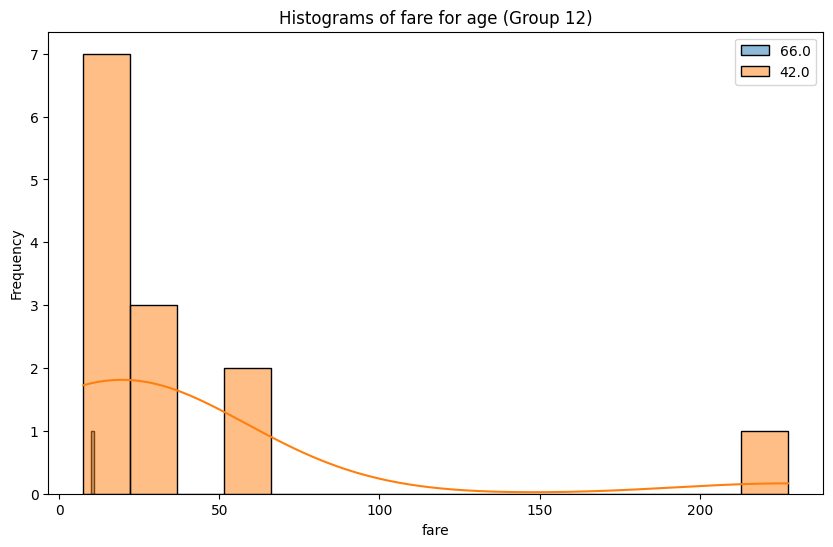

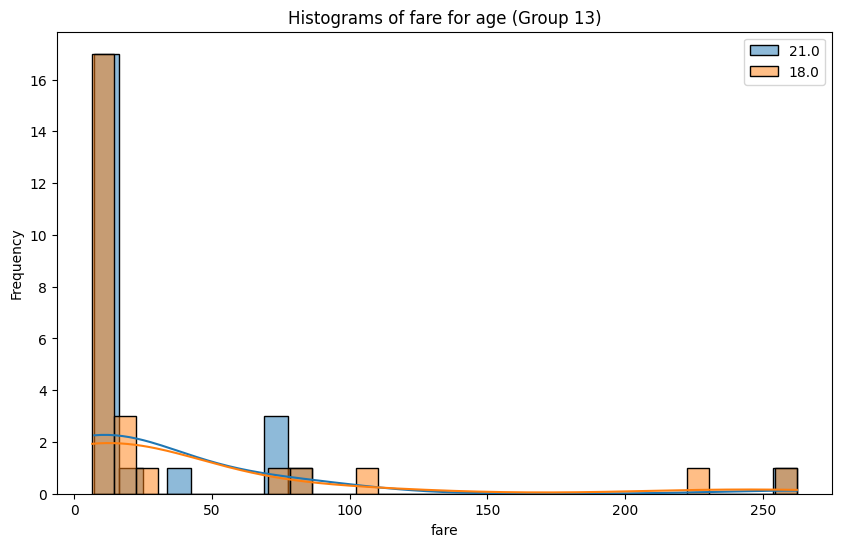

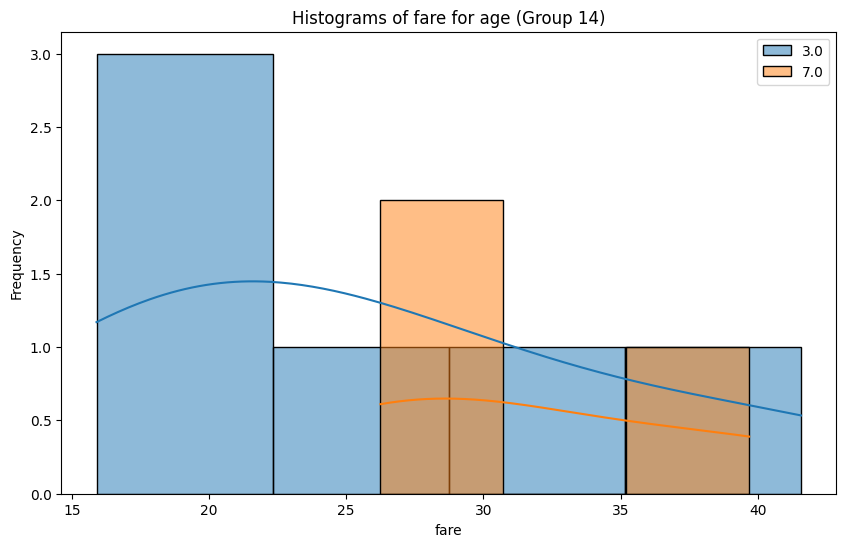

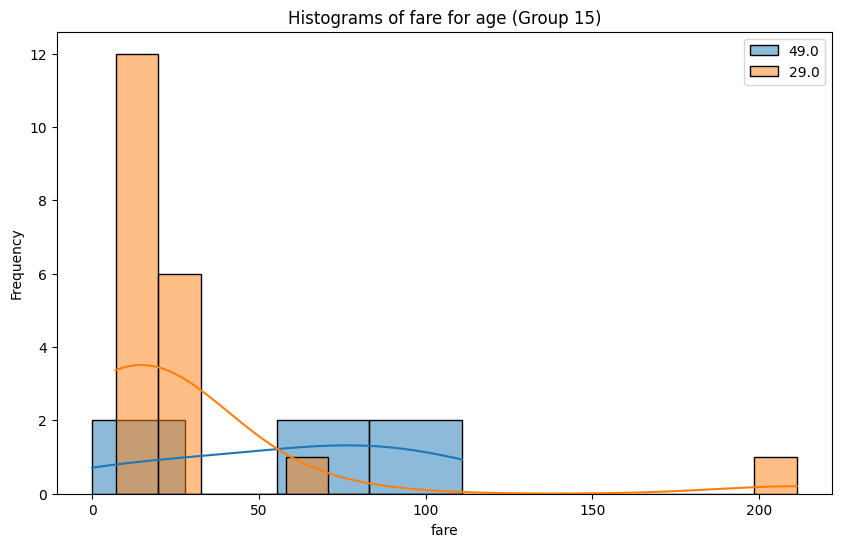

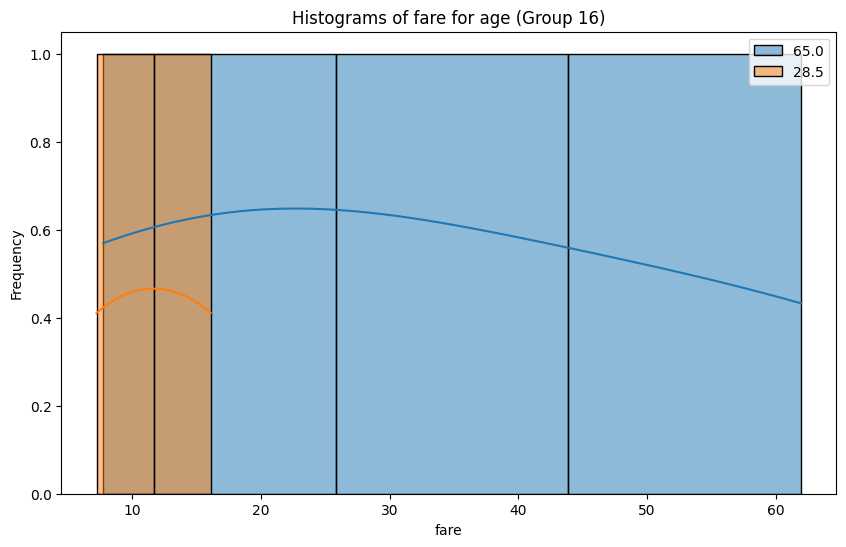

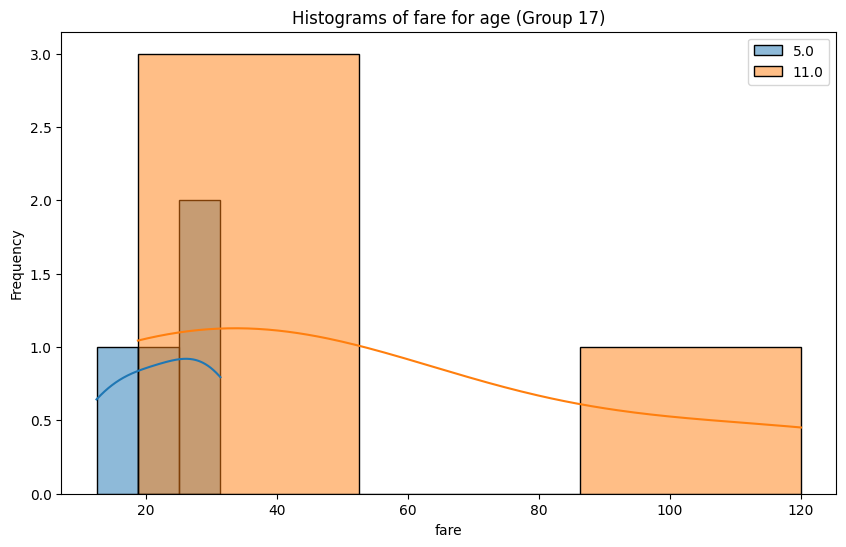

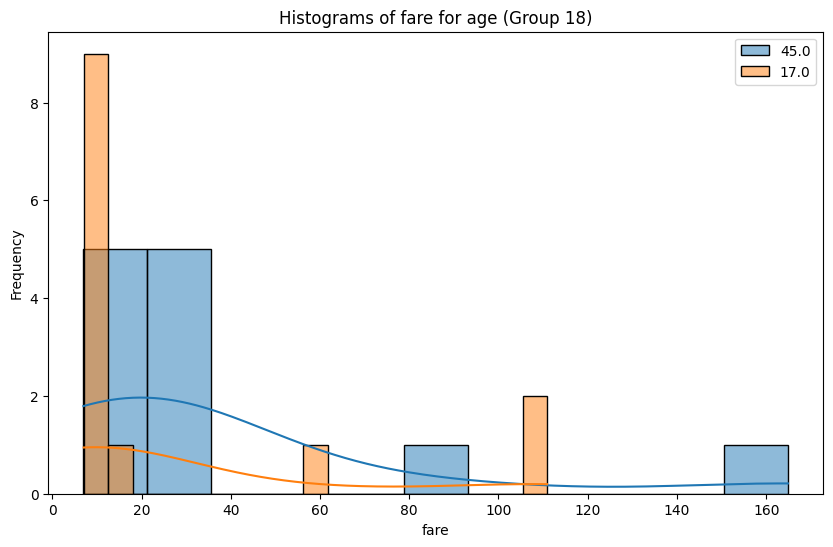

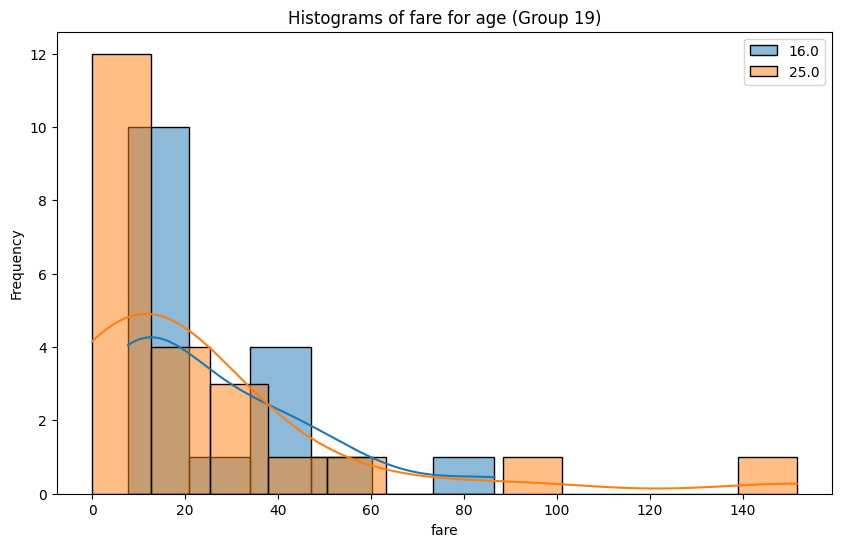

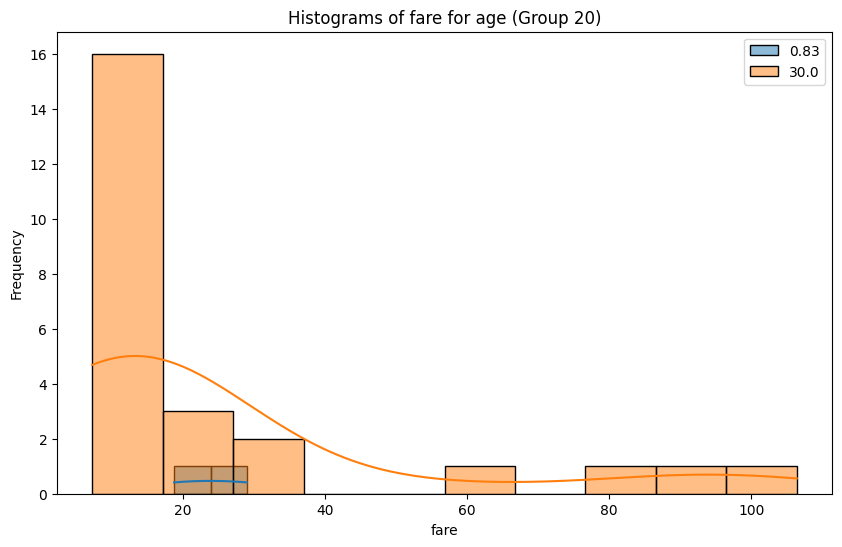

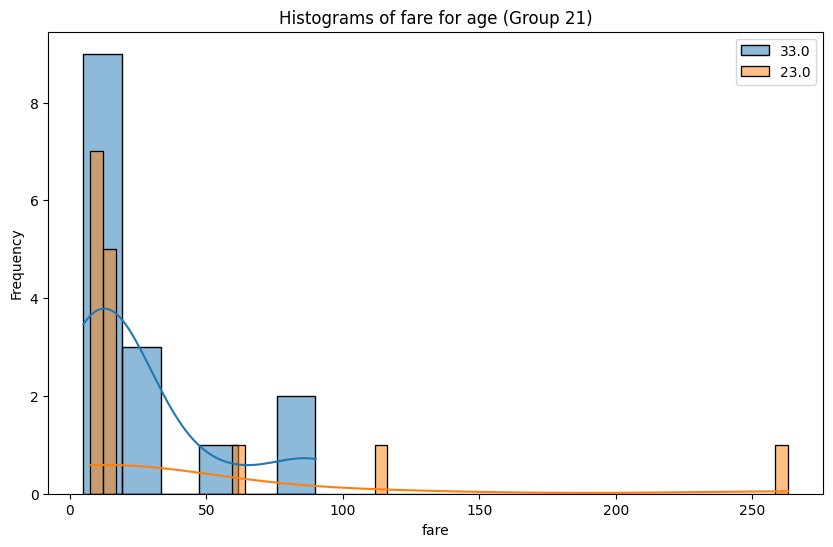

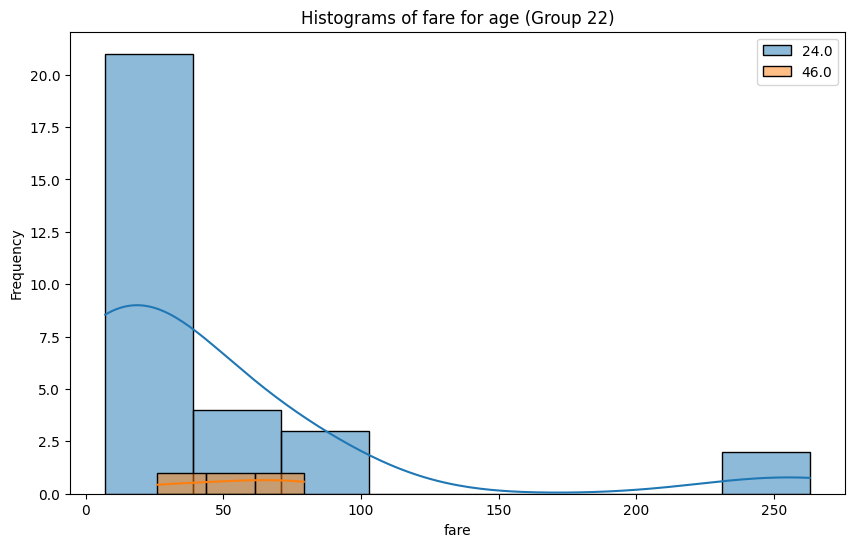

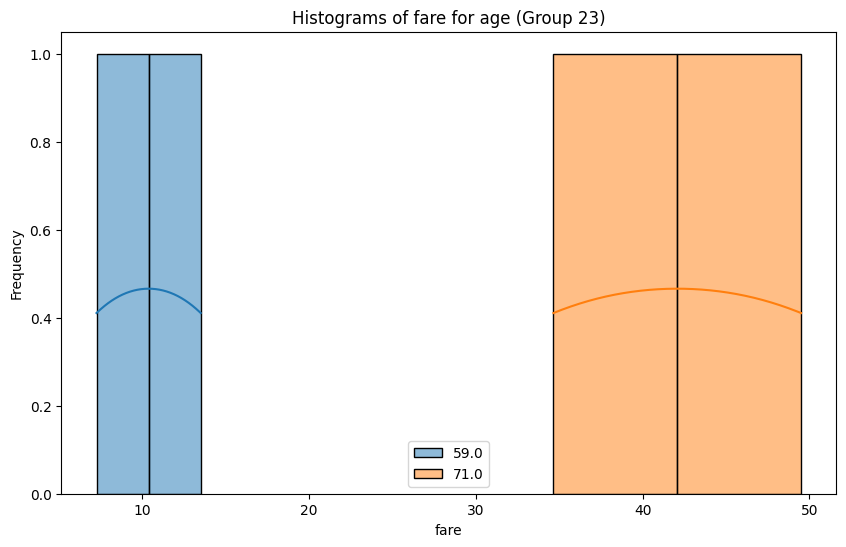

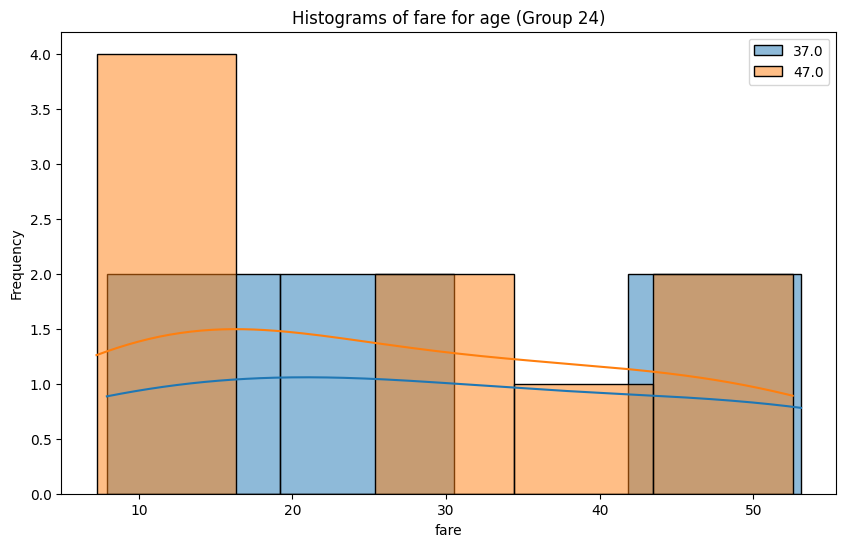

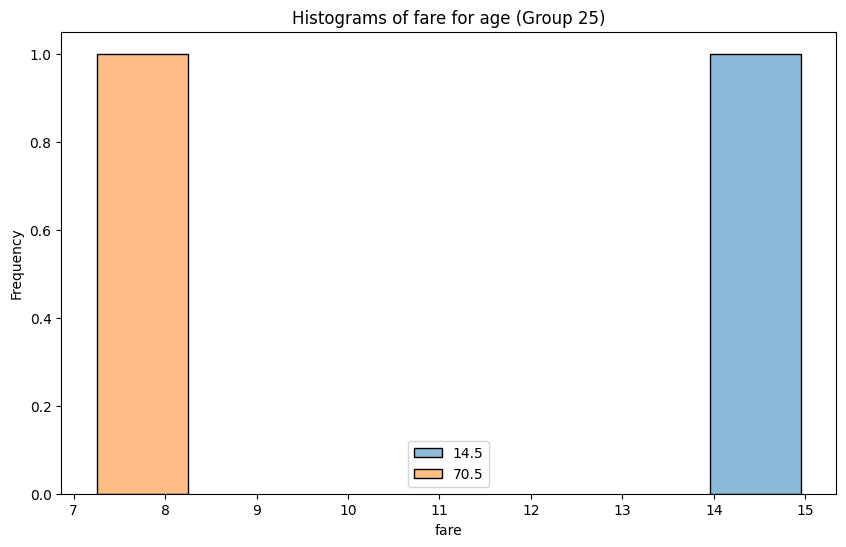

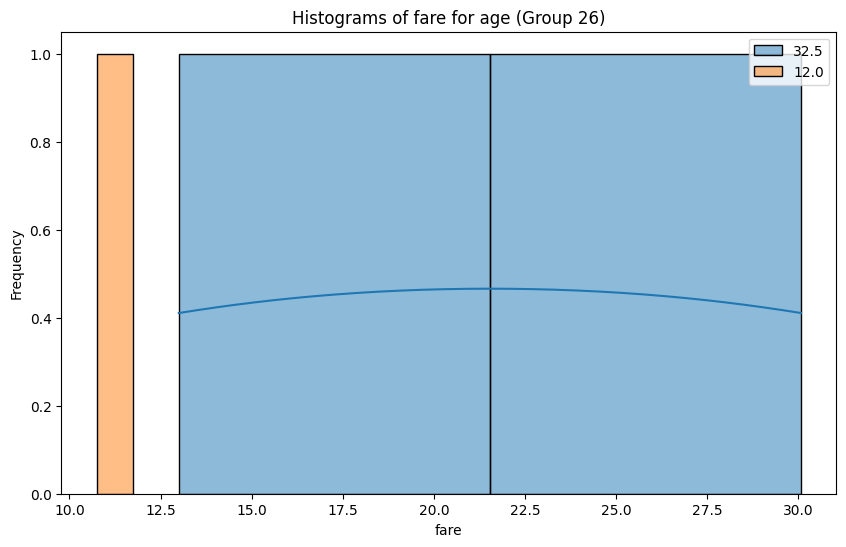

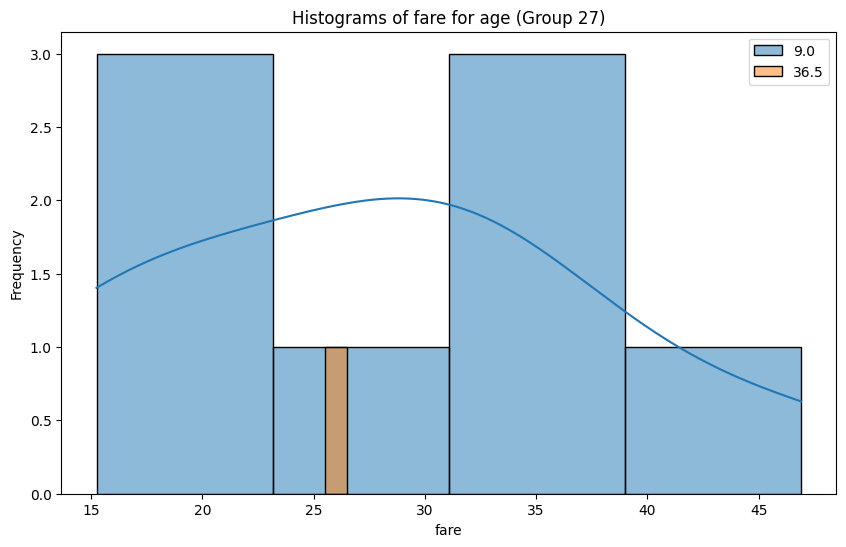

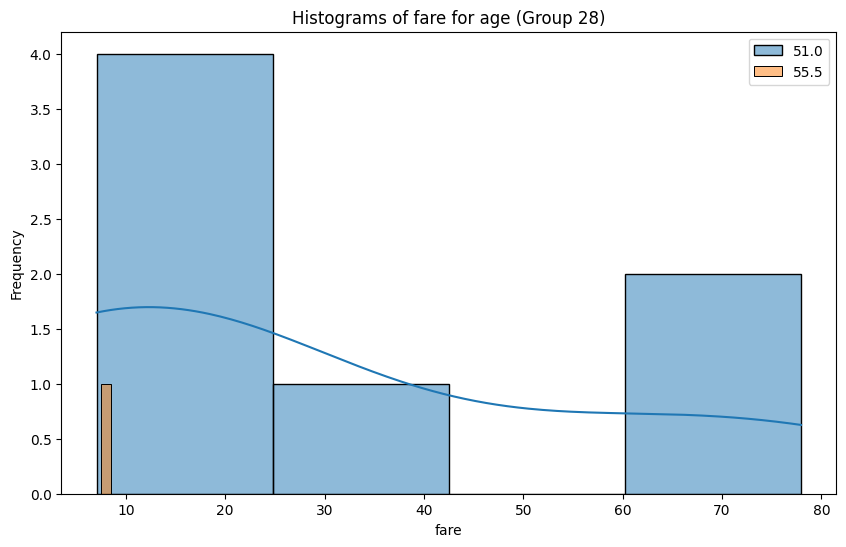

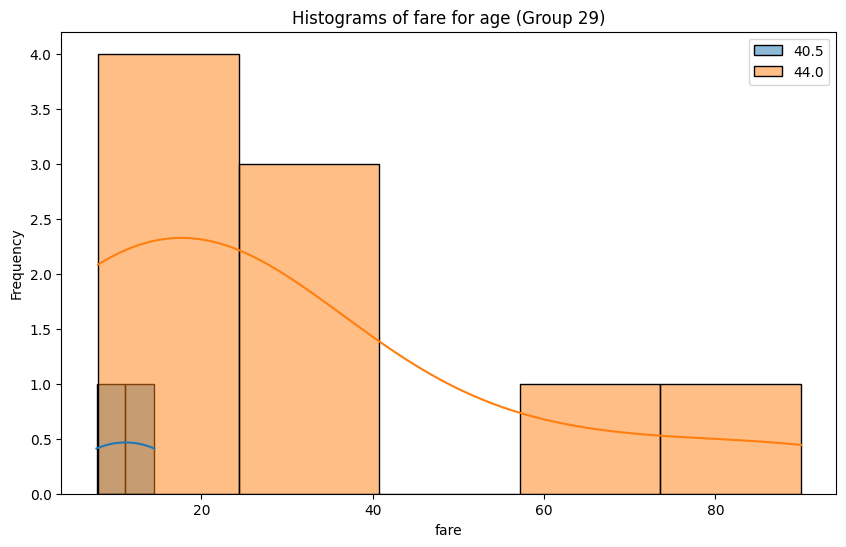

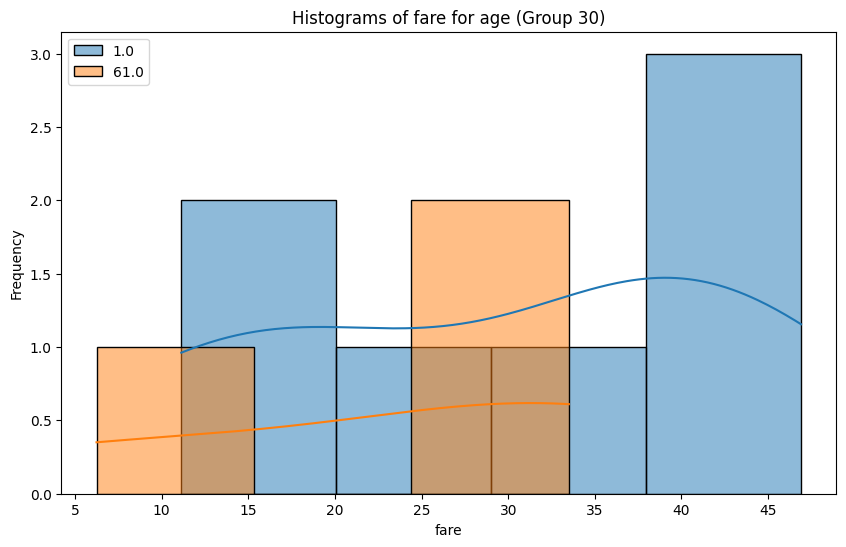

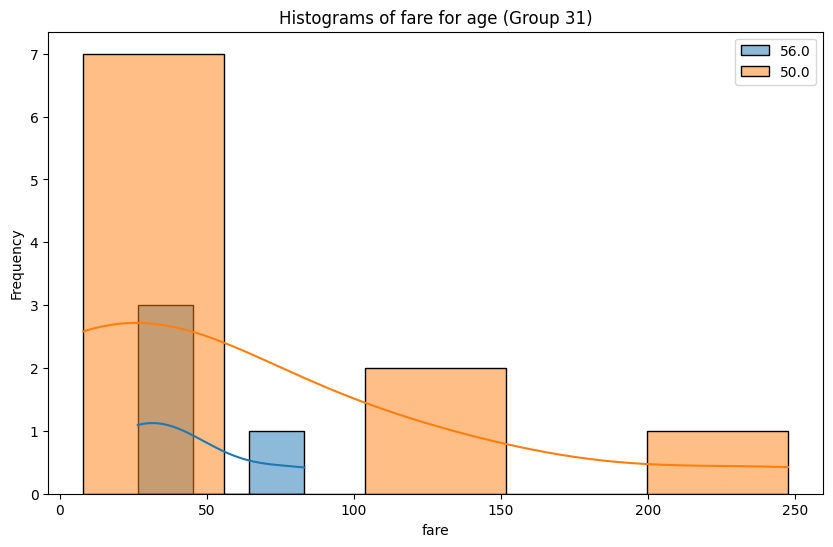

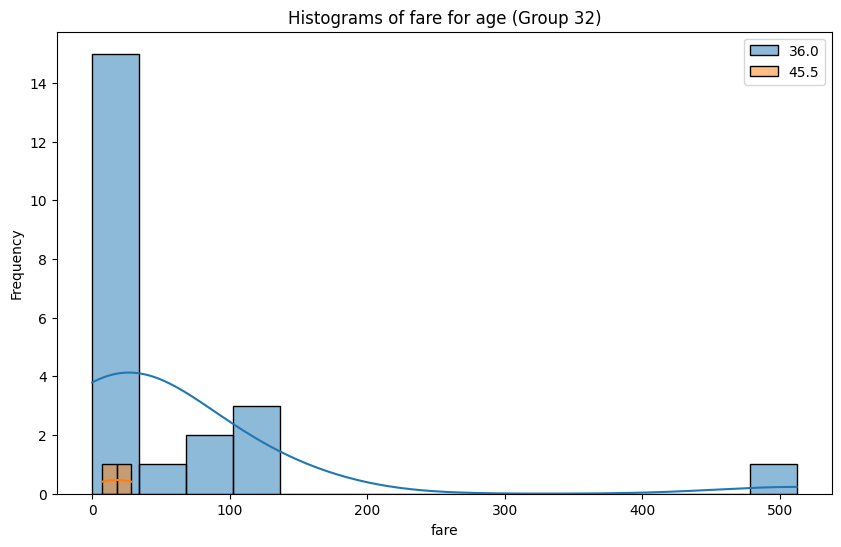

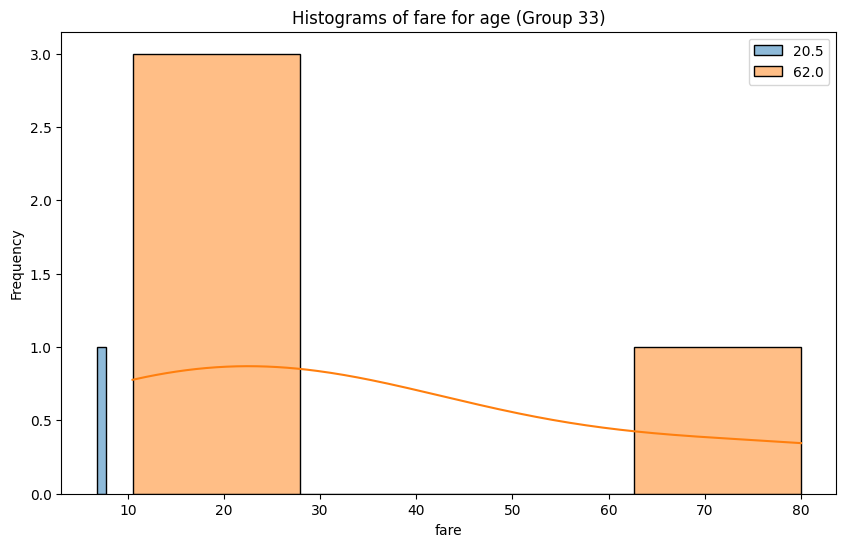

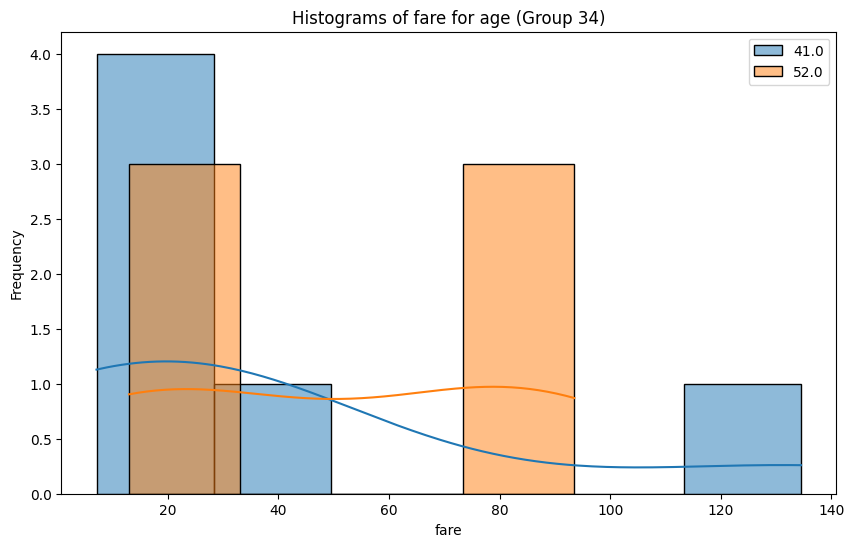

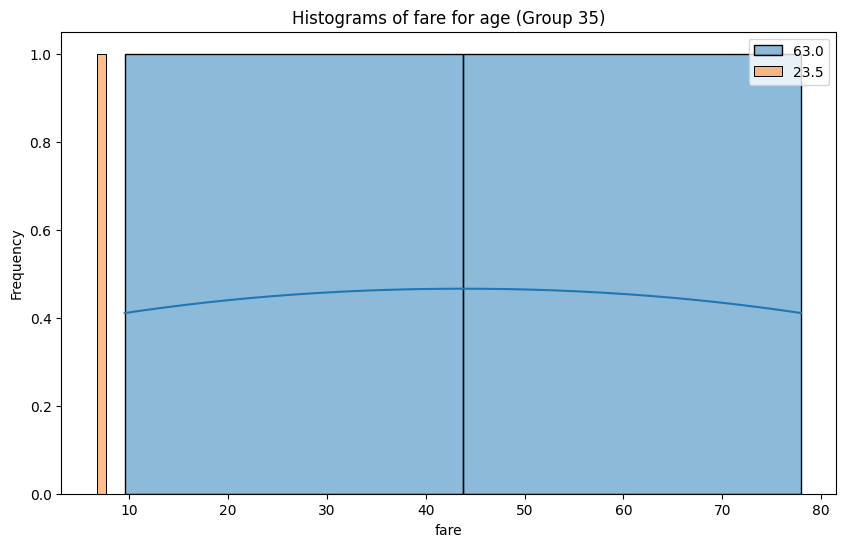

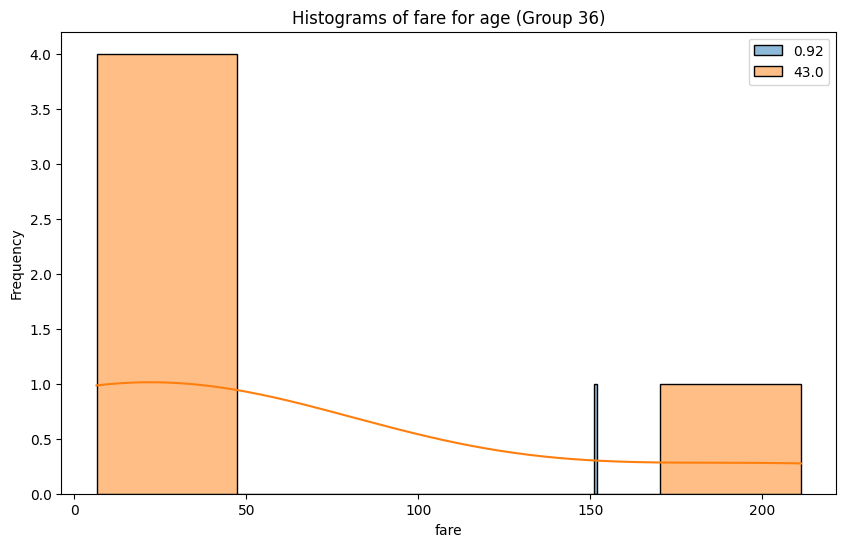

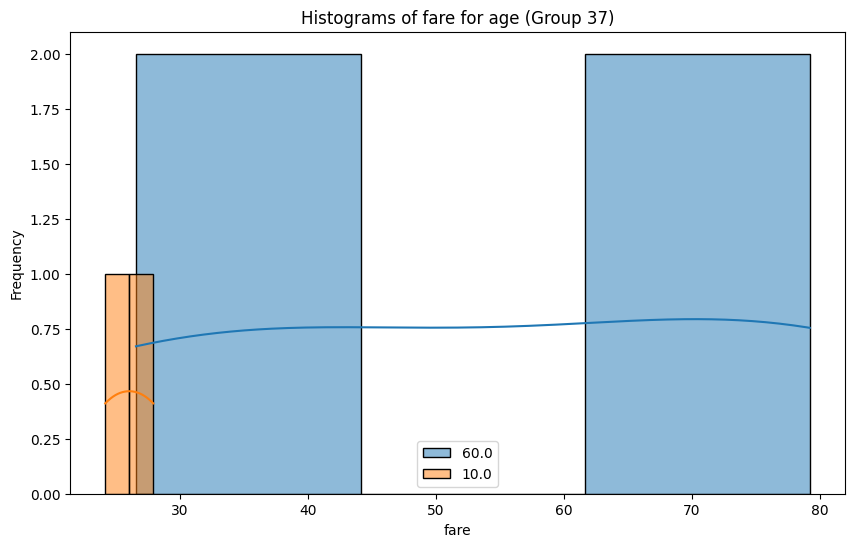

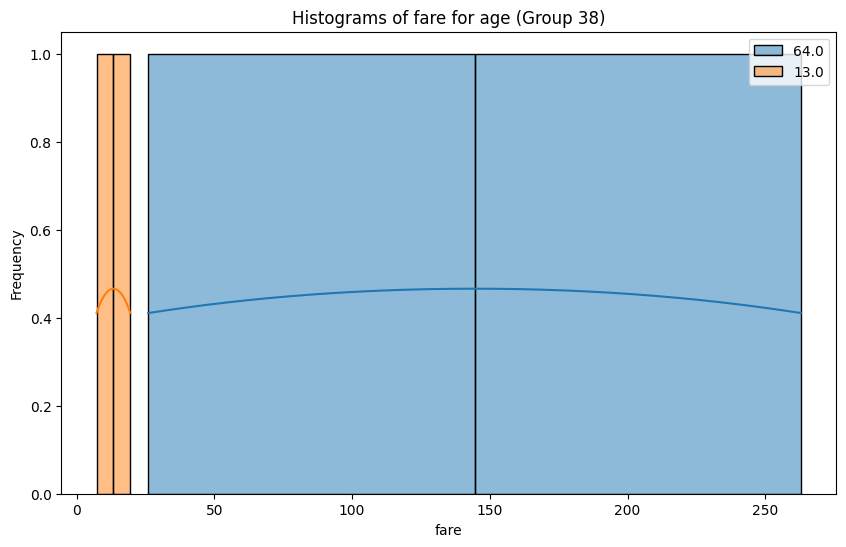

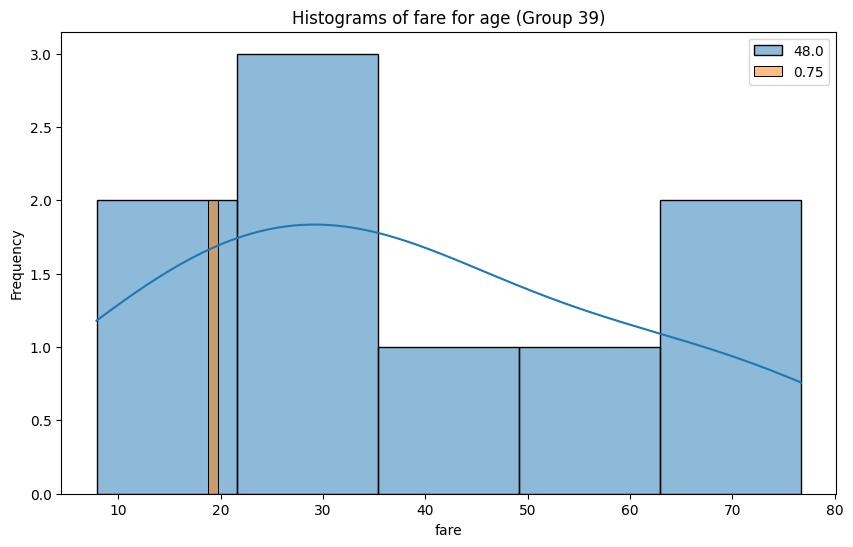

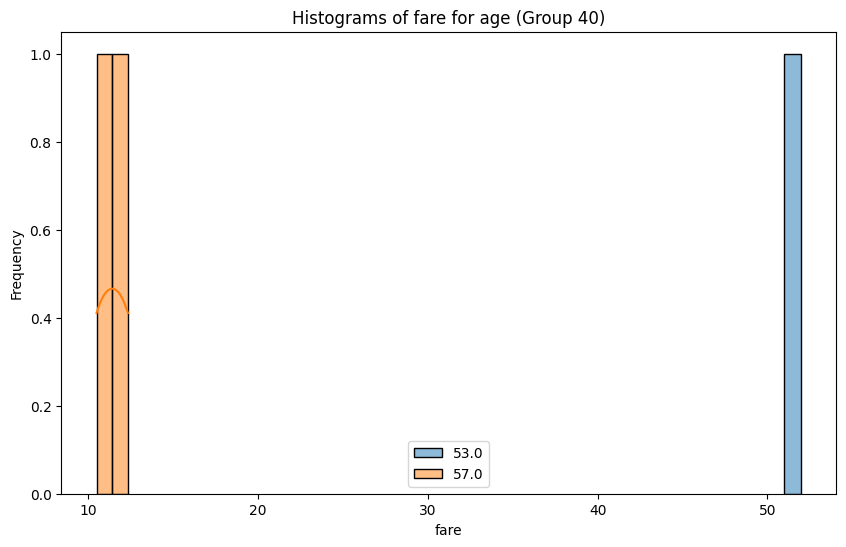

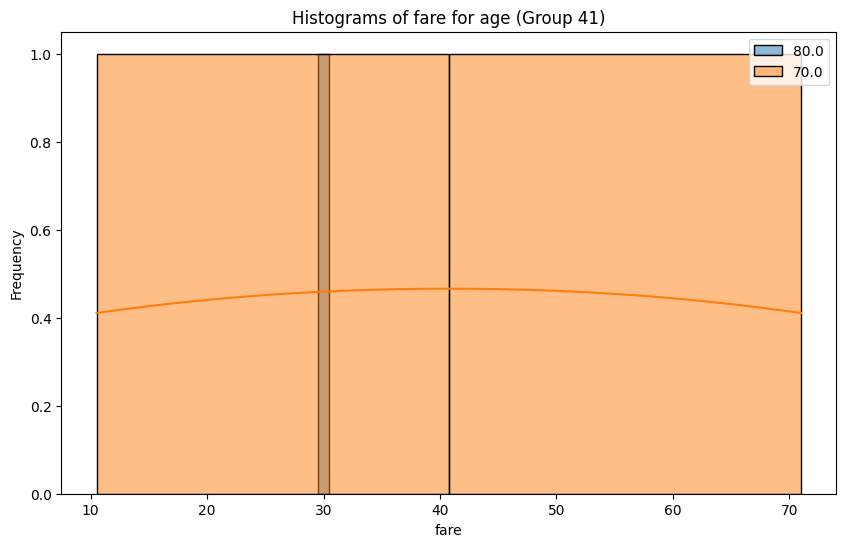

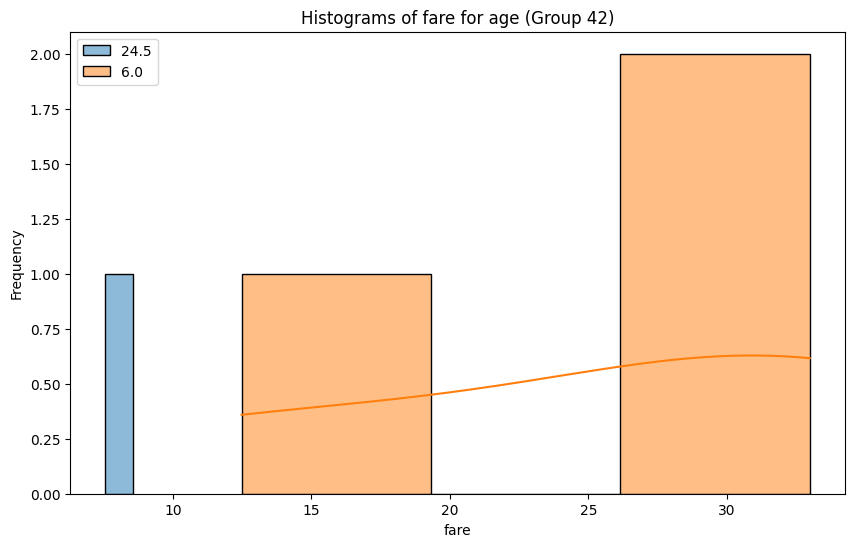

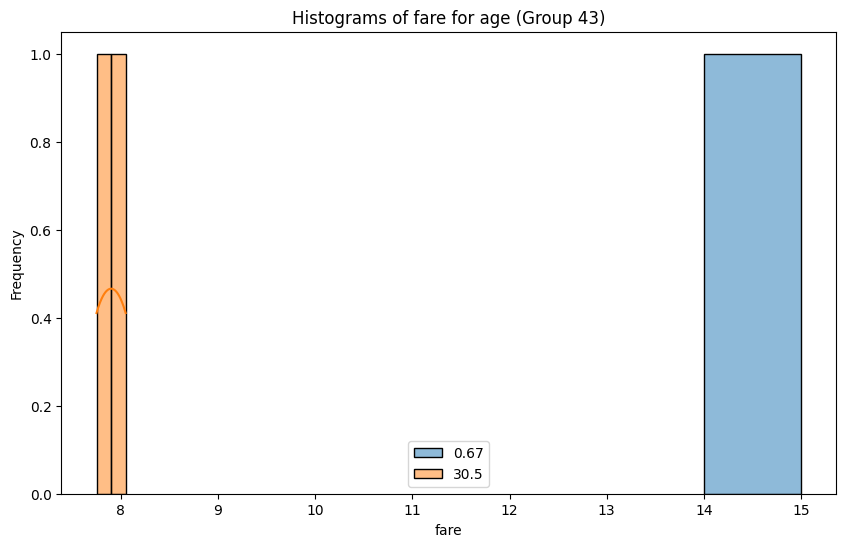

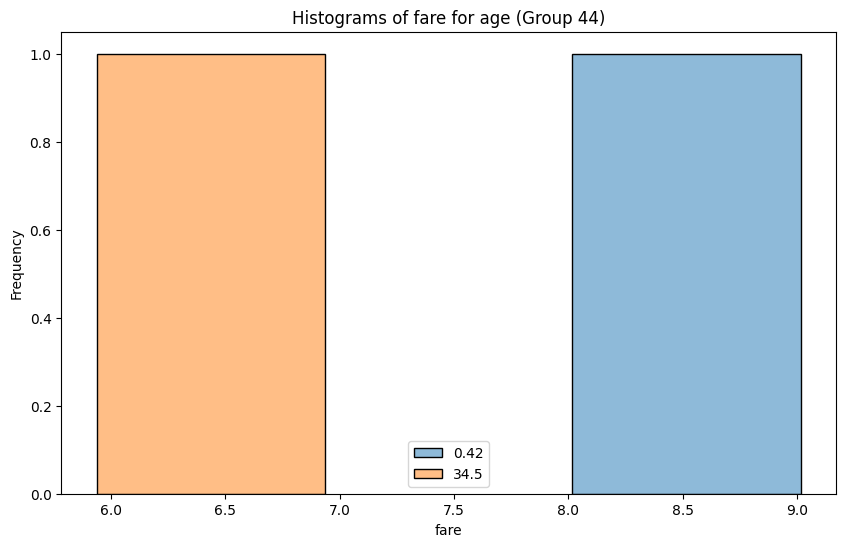

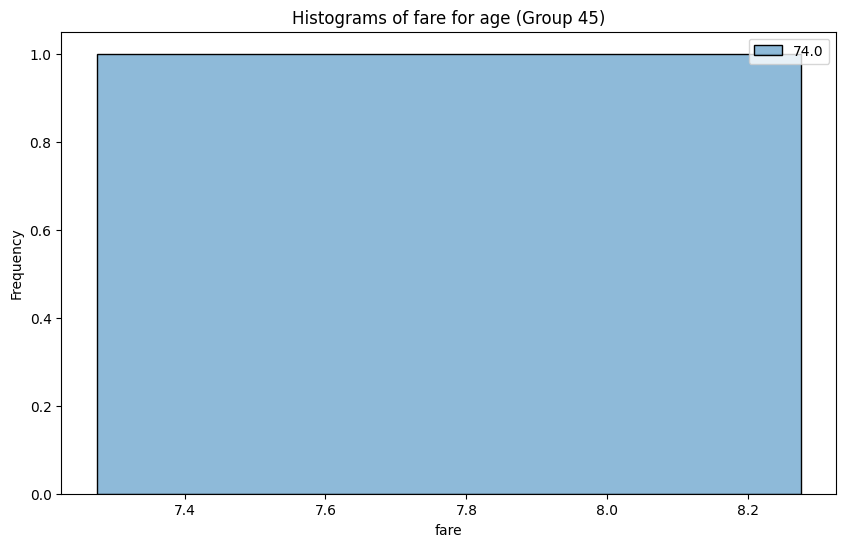

In [31]:
plot_grouped_histograms(df, cat_col="age",num_col="fare", group_size= 2)

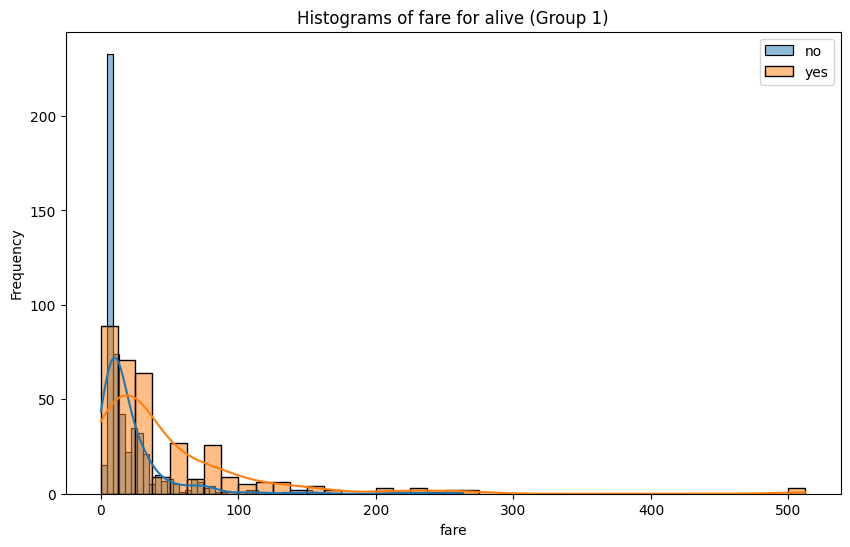

In [32]:
plot_grouped_histograms(df, cat_col="alive",num_col="fare", group_size= 2)

In [33]:
from scipy.stats import mannwhitneyu

In [34]:
grupo_a = df.loc[df.alive == "yes"]["fare"]
grupo_b = df.loc[df.alive == "no"]["fare"]

In [35]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


### Conclusion 8
Los resultados del análisis de la relación entre el precio del billete (Fare) y la supervivencia (Alive) muestran una diferencia significativa en las distribuciones. El valor p obtenido , indica una relación estadísticamente significativa entre estas dos variables. Los supervivientes tendieron a pagar tarifas más altas, como se observa en los histogramas. Este hallazgo sugiere que el precio del billete tiene una fuerte influencia en las probabilidades de supervivencia en el Titanic. En resumen, pagar un precio más alto parece estar relacionado con mayores probabilidades de supervivencia.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [36]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


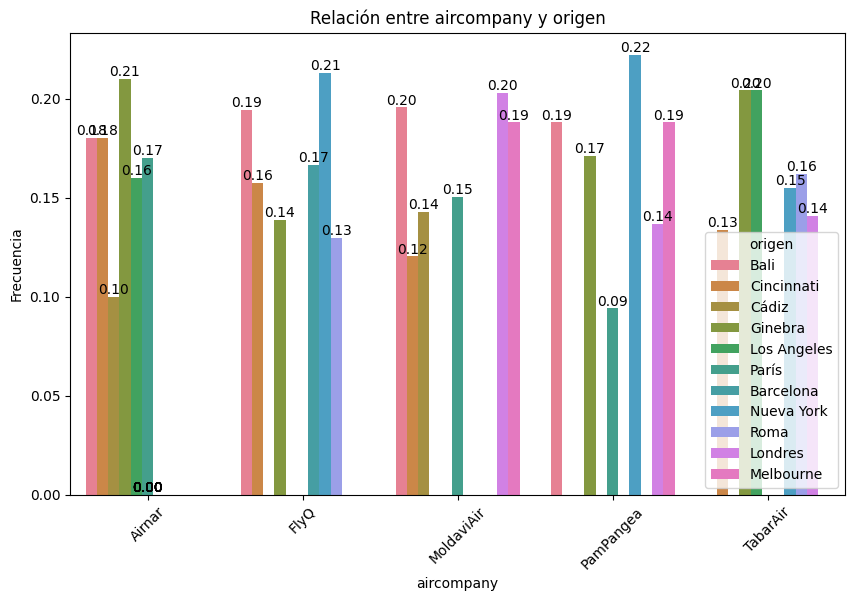

In [37]:
plot_categorical_relationship_fin(df_air_jun,"aircompany","origen", relative_freq= True, show_values= True)

In [38]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

Respuesta Airnar:


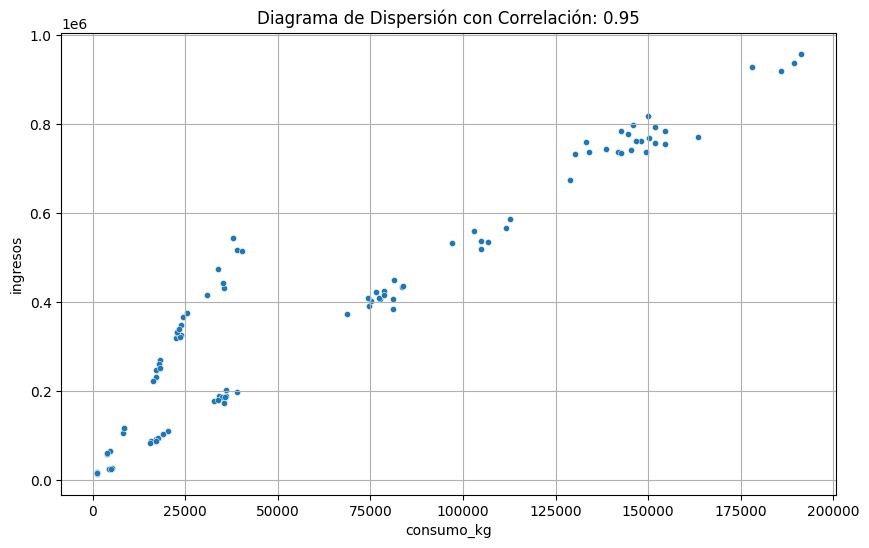

Respuesta FlyQ:


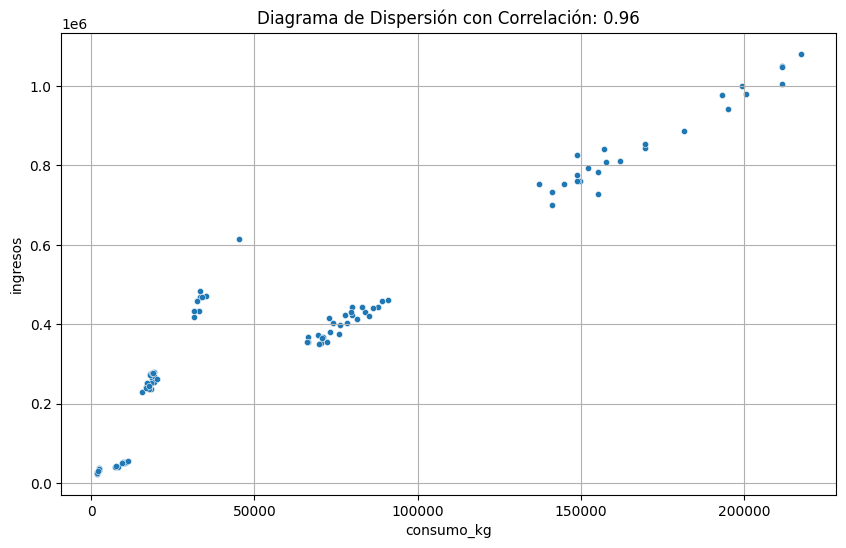

Respuesta TabarAir:


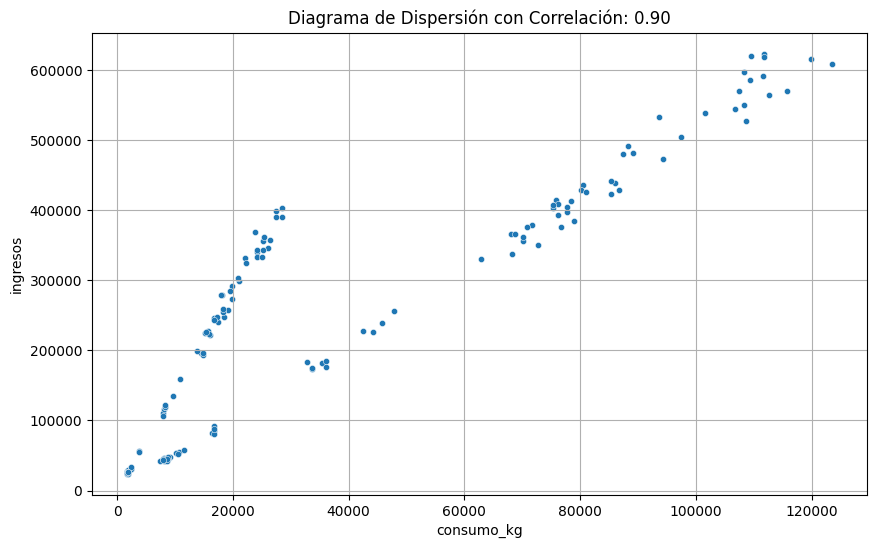

Respuesta MoldaviAir:


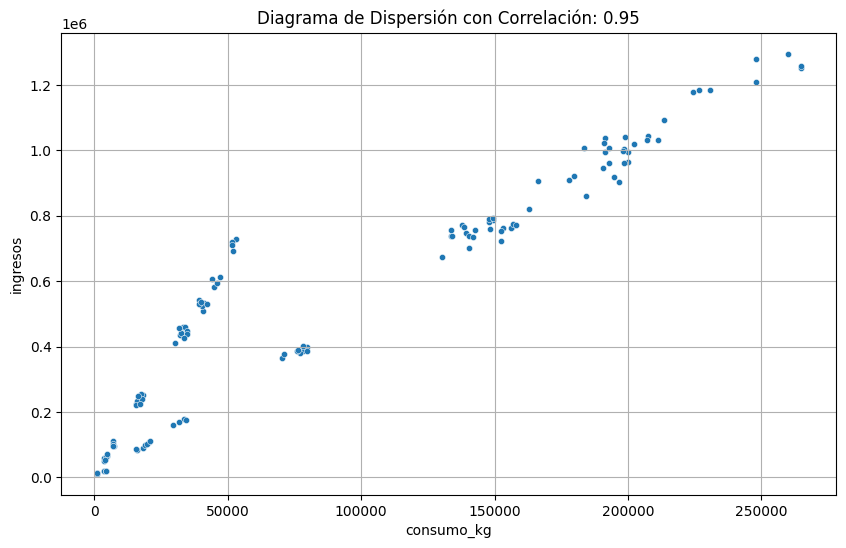

Respuesta PamPangea:


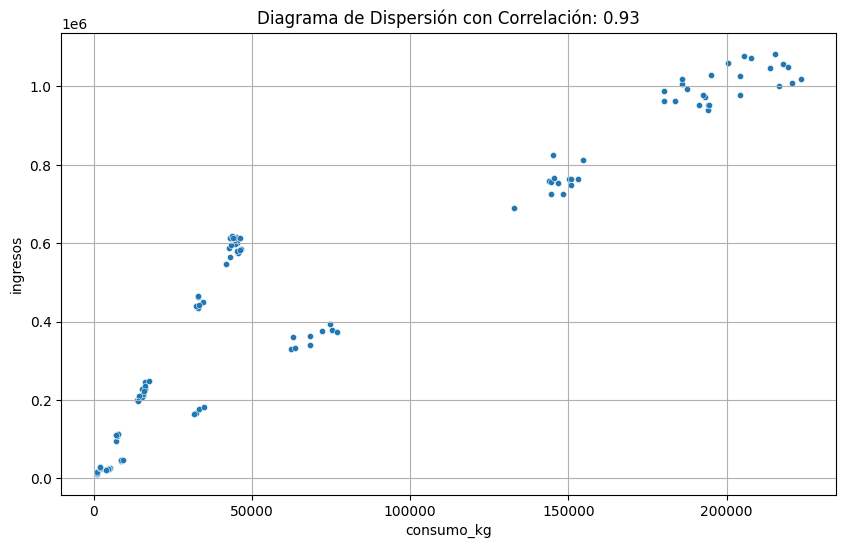

In [39]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Conclusion
TabarAir viendo que hay una correlación ente ingresos y consumos, pero el hecho de que haya realmente dos rectas nos habla de que los vuelos cortos son más eficientes que los largos,deberiamos incluir barcelona por ejemplo.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

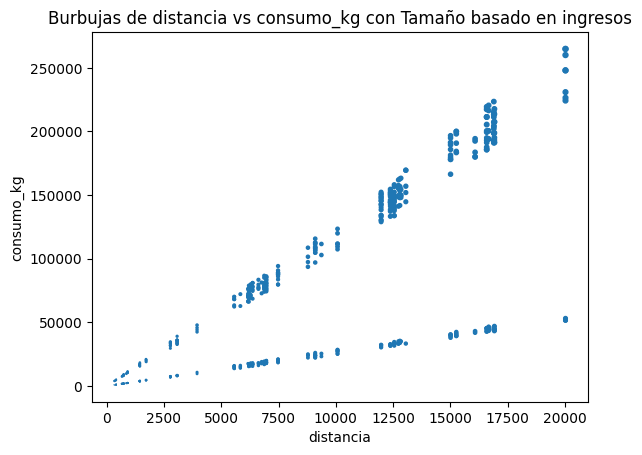

In [40]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

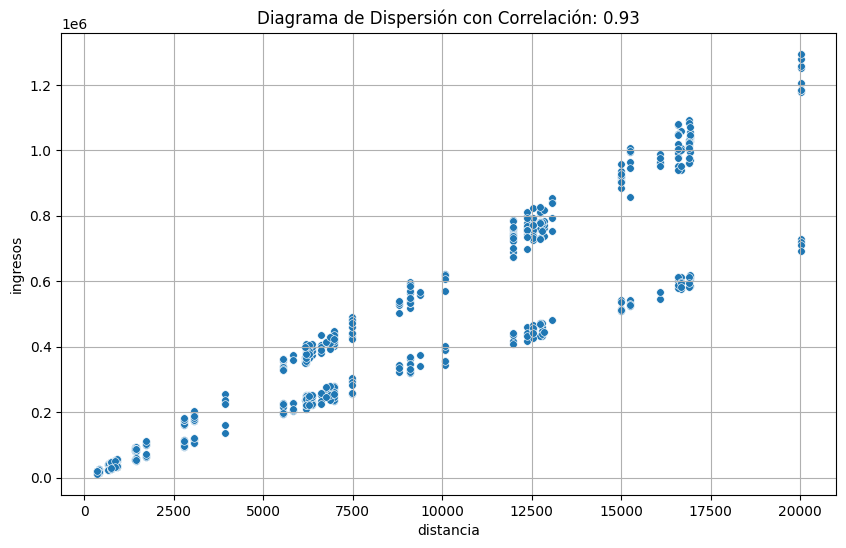

In [41]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

### Conclusion
El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [42]:
df_air_jun['cat_vuelo'] = pd.qcut(df_air_jun['distancia'], q=4, labels=['Muy Corto', 'Corto', 'Largo', 'Muy Largo'])

# Mostrar el DataFrame con la nueva variable
print(df_air_jun[['distancia', 'cat_vuelo']].head())

   distancia  cat_vuelo
0        411  Muy Corto
1      12738  Muy Largo
2       9103      Largo
3       6370      Corto
4       7480      Largo


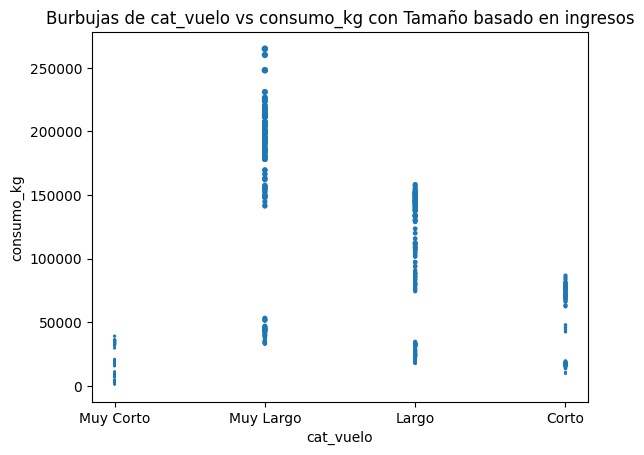

In [43]:
bubble_plot(df_air_jun,"cat_vuelo","consumo_kg","ingresos", scale = 100000)

### Conclusion
No se muestra una relacion clara entre consumo y distancia. Debe de haber otros factores que expliquen esto.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.